# Aircraft analysis with lowest risk



## Overview
This project analyzes which aircraft are the lowest risk for a company to start as a new business endeavor. Discriptive analysis shows that there are some aircrafts that  are safer than others. The business can utilize this analysis to determine which aircraft they want to purchase



## Business Problem

The company I work for is expanding in to new industries to diversify its portfolio and they are specifically interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft.

I have the responsibility to determe which aircraft are the lowest risk for the company to start this new business endeavor. I describe my patterns, trends and relationships that exist and provide actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.


## Data Understanding

In this next section I begin by importing relevant modules and loading the dataset.I then inspecting the dataset by assessing data quality and identifying relevant features to use by asking key questions that will help solve the business question.
I then explore my data to try and look for key patterns, trends and relationships



In [ ]:
#import the pandas and numpy libraries and give them aliases
import pandas as pd
import numpy as np

In [ ]:
#load the dataset and display the first 5 rows
df = pd.read_csv('AviationData.csv', encoding= 'latin-1')
pd.set_option('display.max_columns', None) #displays all columns

#create a copy of the dataframe
df_copy = df.copy()

#preview the dataframe
df.head(3)

<ipython-input-25-0c312479ce63>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding= 'latin-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


### Identifing the most relevant Features

Select features that can be used to solve the business problem.By focusing on these i will likely uncover patterns and trends. It also makes the analysis process easier to interprate. During analysis if some features are not as relevant then drop

- you can know if a column is categorical by just checking the top and for those you aren't sure you can you can get the specific column and find the value_counts()

In [ ]:
# display a summary statistics including all columns
df.describe(include='object').T


,count,unique,top,freq
Event.Id,88889,87951,20001214X45071,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,WPR23LA045,2
Event.Date,88889,14782,1982-05-16,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25592,332739N,19
Longitude,34373,27156,0112457W,24
Airport.Code,50132,10374,NONE,1488
Airport.Name,52704,24870,Private,240


In [ ]:
#display the summary statistics of numerical columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [ ]:
# display the dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

> Use a for loop to iterate through the columns so as to check for unique categories and the number of times each unique category appears
> Filter out the result to exclude columns that have high number of unique values as they will not likely help us find patterns/trends. This is done by using the <=30

In [ ]:
df_copy['Event.Id'].value_counts()
df_copy['Number.of.Engines'].value_counts()


,count
Number.of.Engines,
1.0,69582
2.0,11079
0.0,1226
3.0,483
4.0,431
8.0,3
6.0,1


#Using the loop to iterate over columns so as to view the number of categories in each of them while also seeing the number of times each category appeared

In [ ]:
# Iterate over columns and print value_counts for columns with 30 or fewer unique values
for column in df_copy.columns:
    if df_copy[column].nunique() <= 30:
        # print(f"Value counts for {column}:")
        print(df_copy[column].value_counts())
        print("\nTotal non-null", df_copy[column].value_counts().sum())
        print("\n" + "="*30 + "\n")


Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64

Total non-null 88889


Aircraft.damage
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: count, dtype: int64

Total non-null 85695


Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

Total non-null 32287


Amateur.Built
No     80312
Yes     8475
Name: count, dtype: int64

Total non-null 88787


Number.of.Engines
1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: count, dtype: int64

Total non-null 82805


Engine.Type
Reciprocati

## Data Preparation

### Data Cleaning

In this step after we have explored and understood our data I will be clean my data so i have the relevant columns with clean rows

1. Drop Columns which don't help find patterns or trends. E.g., the IDs, columns that are just for naming,...

In [ ]:
df_copy.describe(include= 'object').T

,count,unique,top,freq
Event.Id,88889,87951,20001214X45071,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,WPR23LA045,2
Event.Date,88889,14782,1982-05-16,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25592,332739N,19
Longitude,34373,27156,0112457W,24
Airport.Code,50132,10374,NONE,1488
Airport.Name,52704,24870,Private,240


In [ ]:
#drop columns related to identification
key_features1 = df_copy.drop(columns = ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
                        'Airport.Code','Latitude', 'Longitude', 'Airport.Name', 'FAR.Description', 'Registration.Number',
                        'Report.Status', 'Publication.Date'])

In [ ]:
#display the remaining columns
key_features1.columns

Index(['Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Schedule', 'Purpose.of.flight',
       'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

#### The columns are now relevant. I go ahead and begin by focusing only on features that directly address my business needs then i can later on decide if I should explore indirect features.
> This is because it will yield a clear result and directly align with the business objective while avoiding unnecessary complexity and noise.

In [ ]:
key_features =key_features1[['Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
                             'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
                             'Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries',
                             'Total.Uninjured', 'Weather.Condition','Broad.phase.of.flight']].copy()
#

In [ ]:
key_features.head(3)

,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise


###2.Deal with missing values

In [ ]:
# display total number of rows
print(len(key_features))
#check the summary of missing values in each column
key_features.isna().sum()

88889


,0
Injury.Severity,1000
Aircraft.damage,3194
Aircraft.Category,56602
Make,63
Model,92
Amateur.Built,102
Number.of.Engines,6084
Engine.Type,7096
Purpose.of.flight,6192
Total.Fatal.Injuries,11401


In [ ]:
#drop columns with more than 50% missing value
key_features.drop(key_features.columns[key_features.isna().mean() >0.5], axis=1, inplace = True)

#confirm row is dropped
key_features.isna().sum()

,0
Injury.Severity,1000
Aircraft.damage,3194
Make,63
Model,92
Amateur.Built,102
Number.of.Engines,6084
Engine.Type,7096
Purpose.of.flight,6192
Total.Fatal.Injuries,11401
Total.Serious.Injuries,12510


### For categorical data impute with the mode while for numerical columns I impute with median since it is the safest as mean can be affected by outliers if they exist

In [ ]:
#Impute the mode for the columns containing categories
key_features['Injury.Severity'] = key_features['Injury.Severity'].fillna(key_features['Injury.Severity'].mode()[0])
key_features['Aircraft.damage'] = key_features['Aircraft.damage'].fillna(key_features['Aircraft.damage'].mode()[0])
key_features['Make'] = key_features['Make'].fillna(key_features['Make'].mode()[0])
key_features['Model'] = key_features['Model'].fillna(key_features['Model'].mode()[0])
key_features['Amateur.Built'] = key_features['Amateur.Built'].fillna(key_features['Amateur.Built'].mode()[0])
key_features['Engine.Type'] = key_features['Engine.Type'].fillna(key_features['Engine.Type'].mode()[0])
key_features['Purpose.of.flight'] = key_features['Purpose.of.flight'].fillna(key_features['Purpose.of.flight'].mode()[0])
key_features['Weather.Condition'] = key_features['Weather.Condition'].fillna(key_features['Weather.Condition'].mode()[0])
key_features['Broad.phase.of.flight'] = key_features['Broad.phase.of.flight'].fillna(key_features['Broad.phase.of.flight'].mode()[0])

#Impute the median for the columns containing numeric data
key_features['Number.of.Engines'] = key_features['Number.of.Engines'].fillna(key_features['Number.of.Engines'].median())
key_features['Total.Fatal.Injuries'] = key_features['Total.Fatal.Injuries'].fillna(key_features['Total.Fatal.Injuries'].median())
key_features['Total.Serious.Injuries'] = key_features['Total.Serious.Injuries'].fillna(key_features['Total.Serious.Injuries'].median())
key_features['Total.Minor.Injuries'] = key_features['Total.Minor.Injuries'].fillna(key_features['Total.Minor.Injuries'].median())
key_features['Total.Uninjured'] = key_features['Total.Uninjured'].fillna(key_features['Total.Uninjured'].median())


In [ ]:
#check for any missing values
key_features.isna().sum()

,0
Injury.Severity,0
Aircraft.damage,0
Make,0
Model,0
Amateur.Built,0
Number.of.Engines,0
Engine.Type,0
Purpose.of.flight,0
Total.Fatal.Injuries,0
Total.Serious.Injuries,0


#### Deal with duplicate values in the dataframe

In [ ]:
#check for duplicates
display(key_features.duplicated().sum())


np.int64(0)

In [ ]:
#drop duplicates
key_features = key_features.drop_duplicates()
#confirm duplicates are dropped
key_features.duplicated().sum()


np.int64(0)

### Validate that the datatypes are correct
 - Categories columns should have object datatype
 - Numerical columns should have float or int

In [ ]:
# validate datatypes categories are objects while numerics are float
key_features.dtypes

,0
Injury.Severity,object
Aircraft.damage,object
Make,object
Model,object
Amateur.Built,object
Number.of.Engines,float64
Engine.Type,object
Purpose.of.flight,object
Total.Fatal.Injuries,float64
Total.Serious.Injuries,float64


### Ensure consistent formatting in the Categorical columns

In [ ]:
#check for consistent formatting
print(key_features['Injury.Severity'].value_counts())
print(key_features['Aircraft.damage'].unique())
print(key_features['Make'].unique())
print(key_features['Model'].unique())
print(key_features['Amateur.Built'].unique())
print(key_features['Engine.Type'].unique())
print(key_features['Purpose.of.flight'].unique())
print(key_features['Weather.Condition'].unique())


Injury.Severity
Non-Fatal     46766
Fatal(1)       5674
Fatal          4717
Fatal(2)       3322
Incident       2177
              ...  
Fatal(96)         1
Fatal(89)         1
Fatal(199)        1
Fatal(114)        1
Fatal(57)         1
Name: count, Length: 109, dtype: int64
['Destroyed' 'Substantial' 'Minor' 'Unknown']
['Stinson' 'Piper' 'Cessna' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']
['108-3' 'PA24-180' '172M' ... 'ROTORWAY EXEC 162-F' 'KITFOX S5'
 'M-8 EAGLE']
['No' 'Yes']
['Reciprocating' 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR' 'NONE'
 'UNK']
['Personal' 'Business' 'Instructional' 'Unknown' 'Ferry'
 'Executive/corporate' 'Aerial Observation' 'Aerial Application'
 'Public Aircraft' 'Skydiving' 'Other Work Use' 'Positioning'
 'Flight Test' 'Air Race/show' 'Air Drop' 'Public Aircraft - Federal'
 'Glider Tow' 'Public Aircraft - Local' 'External Load'
 'Public Aircraft - State' 'Banner Tow' 'Firefi

In [ ]:
#perform formatting on unconsistent feature
key_features['Weather.Condition']= key_features['Weather.Condition'].str.title()

# validate the changes
key_features['Weather.Condition'].unique()

array(['Unk', 'Imc', 'Vmc'], dtype=object)

### Check for outliers

In [ ]:
key_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65689 entries, 0 to 88888
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Injury.Severity         65689 non-null  object 
 1   Aircraft.damage         65689 non-null  object 
 2   Make                    65689 non-null  object 
 3   Model                   65689 non-null  object 
 4   Amateur.Built           65689 non-null  object 
 5   Number.of.Engines       65689 non-null  float64
 6   Engine.Type             65689 non-null  object 
 7   Purpose.of.flight       65689 non-null  object 
 8   Total.Fatal.Injuries    65689 non-null  float64
 9   Total.Serious.Injuries  65689 non-null  float64
 10  Total.Minor.Injuries    65689 non-null  float64
 11  Total.Uninjured         65689 non-null  float64
 12  Weather.Condition       65689 non-null  object 
 13  Broad.phase.of.flight   65689 non-null  object 
dtypes: float64(5), object(9)
memory usage: 7.5+

In [ ]:
key_features.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,65689.000000,65689.000000,65689.000000,65689.000000,65689.000000
mean,1.172449,0.724520,0.306048,0.385133,6.300857
std,0.484074,5.944073,1.655847,2.409650,31.161509
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


<Axes: ylabel='Total.Fatal.Injuries'>

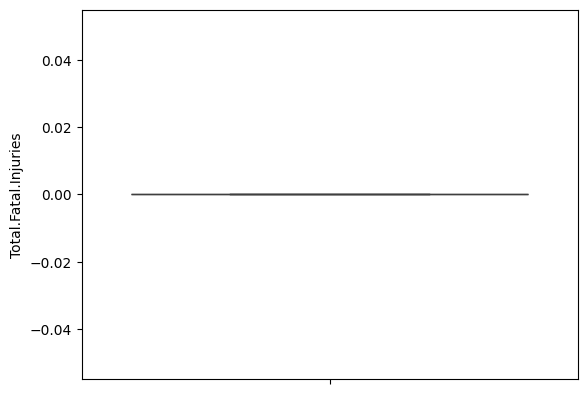

In [ ]:
#to see outliers clearly use boxplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=key_features['Total.Fatal.Injuries'], showfliers=False)

In [ ]:
key_features['Total.Fatal.Injuries'].value_counts().head(10)

,count
Total.Fatal.Injuries,
0.0,49424
1.0,8063
2.0,4624
3.0,1492
4.0,1027
5.0,345
6.0,213
7.0,101
8.0,70


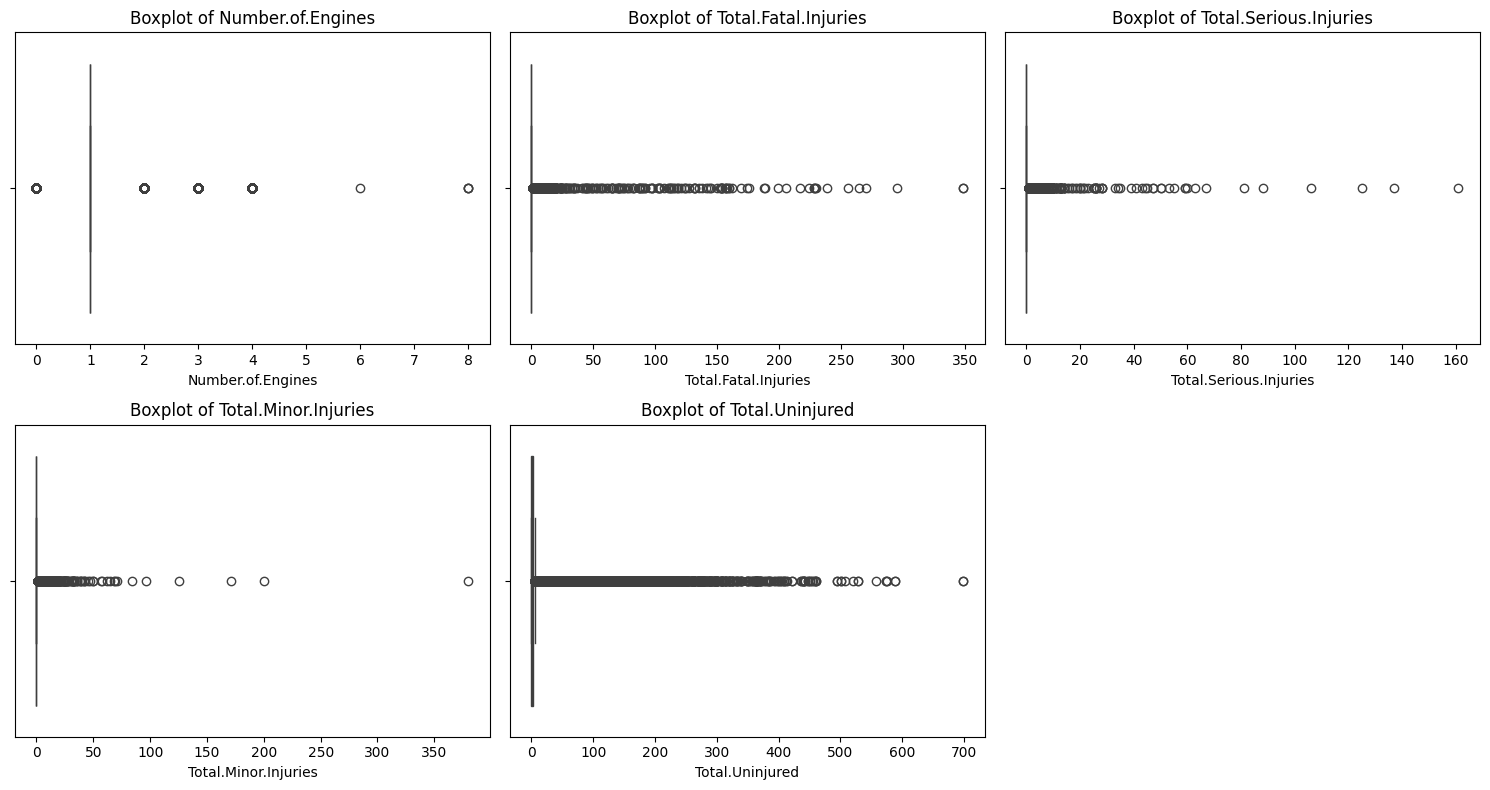

In [ ]:
#import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns
numerical_columns = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Set up the plot for multiple boxplots
plt.figure(figsize=(15, 8))

# Loop through each column and plot a boxplot
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=key_features, x=col)  # Plot the boxplot for each column
    plt.title(f"Boxplot of {col}")

plt.tight_layout()  # Adjust the layout so everything fits without overlap
plt.show()


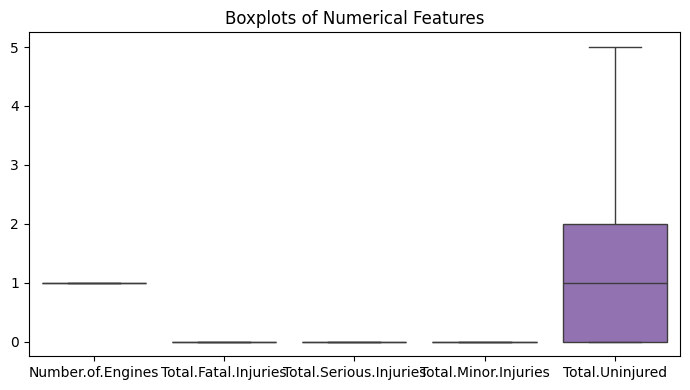

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Generate subplots with a specific size (adjust to match your display preference)
plt.figure(figsize=(7, 4))

# Create a boxplot for each column in numerical_columns with a similar style to the random example
sns.boxplot(data=key_features[numerical_columns], showfliers=False)

# Add title
plt.title("Boxplots of Numerical Features")

# Display the plot
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.show()


### Merging Datasets

Before merging the datasets, I create a new `event_num` variable indexing the count of the intake or outcome for each animal ID. This will allow for a 1:1 merge.

In [ ]:
intakes['event_num'] = intakes.sort_values(['intake_date']).groupby(['animal_id']).rank()
outcomes['event_num'] = outcomes.sort_values(['outcome_date']).groupby(['animal_id']).rank()

NameError: name 'intakes' is not defined

Combining the two files yields a single dataset for feature engineering and analysis. I exclude any unmatched outcome or intake data to ensure there are no missing values for the date features. I also exclude mismatched data so that analyses of stay lengths do not end including animals with negative numbers of days in shelter.

In [ ]:
# Merge intakes and outcomes on animal id and year
animal_shelter_df  = pd.merge(intakes,
                              outcomes,
                              on=['animal_id', 'event_num'],
                              how='left')

In [ ]:
# Filter out animals who have yet to have outcomes and keeps animals where outcome data is later than intake date
animal_shelter_df = animal_shelter_df[(~animal_shelter_df['outcome_date'].isna())
                                    & (animal_shelter_df['outcome_date'] > animal_shelter_df['intake_date'])]

# Sorts the column names to be alphabetical
animal_shelter_df = animal_shelter_df[animal_shelter_df.columns.sort_values()]

In [ ]:
animal_shelter_df.head(3)

### Feature Engineering

I create a `days_in_shelter` feature to analyze the amount of time animals spend at AAC.

In [ ]:
animal_shelter_df['days_in_shelter'] = (animal_shelter_df['outcome_date'] - animal_shelter_df['intake_date']).dt.days

I create `year_month` features for aggregating values by month in my analysis.

In [ ]:
# NOTE TO STUDENTS: You will learn better methods for handling time series data later in the course

animal_shelter_df['intake_year_month'] = animal_shelter_df['intake_date'].apply(lambda x: str(x.year) + '-' + x.strftime('%m'))
animal_shelter_df['outcome_year_month'] = animal_shelter_df['outcome_date'].apply(lambda x: str(x.year) + '-' + x.strftime('%m'))

In [ ]:
animal_shelter_df.head(3)

In [ ]:
# Save cleaned dataset as CSV
animal_shelter_df.to_csv('./data/cleaned_animal_center_df.csv')

## Analysis

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Length of Stay

Most animals have short stays at AAC, with a median of 5 days. However, some animals take a very long time to exit - sometimes over 6 months! These extended stays may be partly a result of AAC's No Kill policy.

In [ ]:
animal_shelter_df['days_in_shelter'].describe()

In [ ]:
# Create plot
stay_length_fig, stay_length_axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

stay_length_axes[0].set_title('Short Stays (< 15 Days)')
stay_length_axes[0].set_ylabel('Number of Animals')
stay_length_axes[0].set_xlabel('Days of Shelter')

stay_length_axes[1].set_title('Long Stays (> 180 Days)')
stay_length_axes[1].set_ylabel('Number of Animals')
stay_length_axes[1].set_xlabel('Days of Shelter')

stay_lengths_low = animal_shelter_df['days_in_shelter'][animal_shelter_df['days_in_shelter'] < 15]
stay_lengths_high = animal_shelter_df['days_in_shelter'][animal_shelter_df['days_in_shelter'] > 180]

stay_length_axes[0].hist(stay_lengths_low, bins=15)
stay_length_axes[1].hist(stay_lengths_high, bins=30)

plt.savefig("./images/stay_distributions.png", dpi=150)
plt.show()

### Animals with Long Stays

AAC primarily shelters cats and dogs - cats have slightly longer stays, on average. However, dogs are more likely to have long stays of over 180 days.

In [ ]:
animal_shelter_df[['animal_type','days_in_shelter']].groupby(['animal_type']).agg(['count', 'median', 'mean'])

In [ ]:
def stay_length_type(days):
    '''
    This function takes in a number of days and returns a descriptive string.
    This is used to categorize animal stay lengths for further analysis.

    Less than 15 days: 'Short'
    15 to 180 days: 'Medium'
    More than 180 days: 'Long'
    '''
    if (days < 15):
        return 'Short'
    elif (days > 180):
        return 'Long'
    else:
        return 'Medium'

In [ ]:
animal_shelter_df['stay_length'] = animal_shelter_df['days_in_shelter'].apply(stay_length_type)

In [ ]:
stay_length_type_by_animal_type = pd.crosstab(animal_shelter_df['animal_type'], animal_shelter_df['stay_length'], normalize = 'columns')
stay_length_type_by_animal_type

In [ ]:
import matplotlib.ticker as mtick

stay_length_type_by_animal_fig, stay_length_type_by_animal_ax = plt.subplots(figsize=(10, 6))

stay_length_type_by_animal_ax.set_title('Stay Lengths by Animal Type')
stay_length_type_by_animal_ax.set_ylabel('Percent of Sheltered Animals')
stay_length_type_by_animal_ax.set_xlabel('Stay Lengths')

stay_lengths = stay_length_type_by_animal_type.columns
cat_lengths = stay_length_type_by_animal_type.loc['Cat']*100
dog_lengths = stay_length_type_by_animal_type.loc['Dog']*100

dog_bar_plt = stay_length_type_by_animal_ax.bar(stay_lengths, dog_lengths )
cat_bar_plt = stay_length_type_by_animal_ax.bar(stay_lengths, cat_lengths, bottom = dog_lengths )

stay_length_type_by_animal_ax.legend([cat_bar_plt, dog_bar_plt], ['Cats', 'Dogs'], loc = 'upper left')
stay_length_type_by_animal_ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.savefig("./images/stay_lengths_by_type.png", dpi=150)
plt.show()

### Seasonality of Intake and Exit Volume

The number of animal intakes typically peaks in the spring and bottoms out in the fall and winter. Animal exits follow a similar trend, but tend to lag behind intakes by about one month. This pattern does not seem to hold in 2020, possibly as a result of the COVID-19 pandemic.

In [ ]:
months = animal_shelter_df['intake_year_month'].sort_values().unique()

# Counts of Intakes and exits by Month
intakes_by_month = animal_shelter_df[['intake_year_month', 'animal_id']].groupby('intake_year_month').count()
exits_by_month = animal_shelter_df[['outcome_year_month', 'animal_id']].groupby('outcome_year_month').count()

in_out_df = pd.DataFrame(intakes_by_month).rename(columns={'animal_id': 'Number of Intakes'})
in_out_df['Number of Exits'] = exits_by_month

# Create plot
in_out_fig, in_out_ax = plt.subplots(figsize=(10, 6))

in_out_ax.set_title('Intakes and Exits by Month')
in_out_ax.set_ylabel('Number of Animals')
in_out_ax.set_xlabel('Month')

in_plt, out_plt = in_out_ax.plot(in_out_df)

in_out_ax.legend([in_plt, out_plt], ['Number of Intakes', 'Number of Exits'], loc = 'lower left')
plt.xticks(months[::3], rotation = 70)
plt.grid()

plt.savefig("./images/in_out_by_month.png", dpi=150)
plt.grid()
plt.show()

### Seasonality of Sheltered Animal Counts

The total number of sheltered animals typically peaks in May of each year and then hits its lowest point around January. There is often a secondary peak sometime after May before the number of sheltered animals drops rapidly. The number of sheltered animals has dropped precipitously in 2020, likely as a result of COVID-19.

In [ ]:
# Net Change in Sheltered Animal Counts
in_out_df['Change in Sheltered Animal Counts'] = in_out_df['Number of Intakes'] - in_out_df['Number of Exits']
in_out_df['Total Sheltered Animal Counts'] = in_out_df['Change in Sheltered Animal Counts'].sort_index().cumsum()
in_out_df['Total Sheltered Animal Counts'] = in_out_df['Total Sheltered Animal Counts'] + in_out_df['Total Sheltered Animal Counts'].min()

# Create Plot
shelter_count_fig, shelter_count_ax = plt.subplots(figsize=(10, 6))

shelter_count_ax.set_title('Sheltered Animal Counts by Month')
shelter_count_ax.set_ylabel('Number of Animals')
shelter_count_ax.set_xlabel('Month')

shelter_count_plt, shelter_change_plt = shelter_count_ax.plot(in_out_df[['Total Sheltered Animal Counts', 'Change in Sheltered Animal Counts']])

shelter_count_ax.legend([shelter_count_plt, shelter_change_plt], ['Total Sheltered Animal Counts', 'Change in Sheltered Animal Counts'], loc = 'upper left')
plt.xticks(months[::3], rotation = 70)
plt.grid()

plt.savefig("./images/sheltered_by_month.png", dpi=150)
plt.grid()
plt.show()

## Conclusions

This analysis leads to three recommendations for improving operations of the Austin Animal Center:

- **Engage in targeted outreach campaigns for dogs that have been sheltered at AAC for more than 30 days.** While most dogs will have been placed after 30 days, this may help reduce the number of dogs that end up having extended stays, potentially requiring many more months of care.
- **Reduce current spending until the numbers of intakes and sheltered animals return to normal.** Given the reduced activity during this period, AAC should consider ways to temporarily reduce costs by changing space utilization or staffing.
- **Hire seasonal staff and rent temporary space for May through December.** To accommodate the high volume of intakes and number of sheltered animals in the spring and fall, AAC should leverage seasonal resources, rather than full-year ones. This will allow AAC to cut back on expenditures during the months when there is lower

### Next Steps

Further analyses could yield additional insights to further improve operations at AAC:

- **Better prediction of animals that are likely to have long stays.** This modeling could use already available data, such as breed and intake condition.
- **Model need for medical support.** This modeling could predict the need for specialized personnel to address animals' medical needs, including neutering, using intake condition and sex data.
- **Predicting undesirable outcomes.** This modeling could identify animals that are more likely to have undesirable outcomes (e.g. Euthanasia) for targeted medical support or outreach.